# <i>Dscam</i> Manuscript (Figure 1)
This notebook details to code for visualizations produced for Figure 1 of the <i>Dscam</i> RNAi manuscript.

## Environment setup

In [70]:
# Set working directory
setwd("/Users/alexplocik/Google Drive/UConn/Lab Notebook/Dscam 4.2 EMAP/miSeq data analysis/")

# Install required packages
require(ggplot2)
require(grid)
require(RColorBrewer)
require(repr)

# Set figure dimensions for notebook
options(repr.plot.width = 6, repr.plot.height = 3)

## Custom functions

In [71]:
# A ggplot theme good for small manuscript sized images
theme_bw_small <- function (base_size = 10, base_family = "") 
{
  theme_grey(base_size = base_size, base_family = base_family) %+replace% 
    theme(axis.text = element_text(size = rel(0.8)),
          axis.text.x = element_text(angle = 90, vjust = 0.5),
          axis.ticks = element_line(colour = "black"), 
          legend.key = element_rect(colour = "grey80"),
          panel.background = element_rect(fill = "white", colour = NA),
          panel.border = element_rect(fill = NA, colour = "grey50"), 
          panel.grid.major = element_line(colour = "grey90", size = 0.2), 
          panel.grid.minor = element_line(colour = "grey98", size = 0.5), 
          strip.background = element_rect(fill = "white", colour = "white", size = 0.2)) 
} # theme_bw_small()

plotting.factor.levels <- function(data){
  data$library <- factor(data$library, levels = levels(factor(data$library))[c(3:8, 1:2)], labels = gsub(" \\(", "\n(", levels(factor(data$library)))[c(3:8, 1:2)])
#   data$exon_cluster <- factor(data$exon_cluster, levels = levels(factor(data$exon_cluster))[c(2:4, 1)], labels = levels(factor(data$exon_cluster))[c(2:4, 1)])
  data$exon <- factor(data$exon, levels = levels(factor(data$exon))[c(3:length(levels(factor(data$exon))), 1:2)])
  data
} # plotting.factor.levels()

## Read data from file
Documentation on the generation of this data file is descibed in the "Dscam Manuscript Analysis" notebook.

In [72]:
all <- read.csv("Tables/Combined RNAi experiment data.csv", row.names = 1)
all <- plotting.factor.levels(all) # apply pretty formatting function
head(all)

,exon,RNAi,match,library,splice_event,exon_cluster,replicate,library_RNAi_event_match.sum,library_RNAi_match.sum,library_exon_match.sum,library_match.sum,PSI.num,PSI.denom,PSI,PSI.num.median,PSI.denom.median,PSI.median,cor,z.score
1,4.01,FBgn0038464..CG16941.,7509,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,2766642,6042097,7509,15649,47.9839,8002.5,16641,48.08906,0.9230769,0.1421086
2,4.02,FBgn0038464..CG16941.,46,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,16577,6042097,46,15649,0.2939485,45,16641,0.2704164,0.9230769,0.1286621
3,4.03,FBgn0038464..CG16941.,530,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,185184,6042097,530,15649,3.386798,527.5,16641,3.169882,0.9230769,0.3767351
4,4.04,FBgn0038464..CG16941.,1230,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,415753,6042097,1230,15649,7.859927,1160.5,16641,6.97374,0.9230769,0.5933632
5,4.05,FBgn0038464..CG16941.,984,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,372327,6042097,984,15649,6.287942,1055.5,16641,6.342768,0.9230769,-0.005456143
6,4.06,FBgn0038464..CG16941.,628,Exon 4 (Rep4),inclusion,4,Rep4,15649,15961,221771,6042097,628,15649,4.013036,618,16641,3.713719,0.9230769,0.3126905


# Figure 1A. Dscam gene structure and sequencing strategy
The exon/intron structure of <i>Dscam</i>. Arrows indicte primer positions to generate each of 4 sequencing libraries by RT-PCR.

<img src="images/Figure%201A.%20Dscam%20structure%20and%20primer%20design.png"/>


# Figure 1B. Variant exon matches across all experiments
In total, reads were matched to every variant exon except 6.11, 9.02, and 9.20. The overall distribution is similar to a microarry-based study of <i>Dscam</i> splcing in S2 cells (Neves, Nature Genetics (2004); http://www.ncbi.nlm.nih.gov/pubmed/14758360).

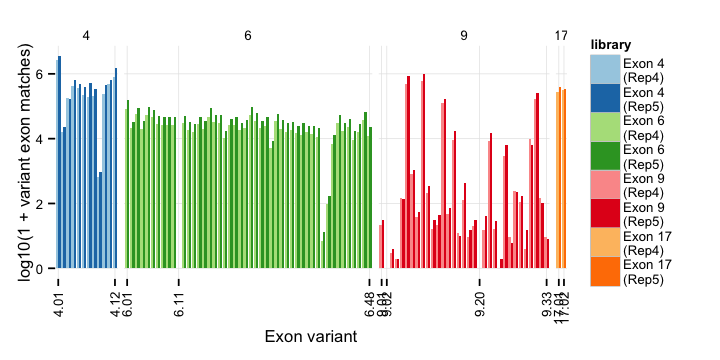

In [73]:
data <- unique(subset(all, splice_event == "inclusion", select = c("exon", "library_exon_match.sum", "library", "replicate", "splice_event", "exon_cluster")))
p <- ggplot(data, aes(x = exon, y = log10(library_exon_match.sum + 1), fill = library)) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ exon_cluster, scale = "free", drop = T, space = "free") +
  scale_fill_brewer(palette = "Paired") +
  ylab("log10(1 + variant exon matches)") +
  xlab("Exon variant") +
  scale_x_discrete(breaks = c("4.01", "4.12", "6.01", "6.11", "6.48", "9.01", "9.02", "9.20", "9.33", "17.01", "17.02"))
p + theme_bw_small() +
theme(panel.grid.minor.y = element_blank(),
        panel.border = element_blank(),
        axis.text.x = element_text(angle = 90)
     )
ggsave("Figures/Figure 1B. Barplot log10(1 + variant exon reads per variant exon per replicate).pdf", height = 3, width = 6)

# Figure 1C-D. Reads matched per RNAi experiment
The following are three plots that each show the number of reads per RNAi experiment. They illustrate how similar the RNAi experiments were in terms of reads matched to <i>Dscam</i>. The barcharts show a fairly even number and indicate that 350 different RNAi experiments were analyzed. While the boxplots don't indicate the number of experiments, they do show outliers more clearly.

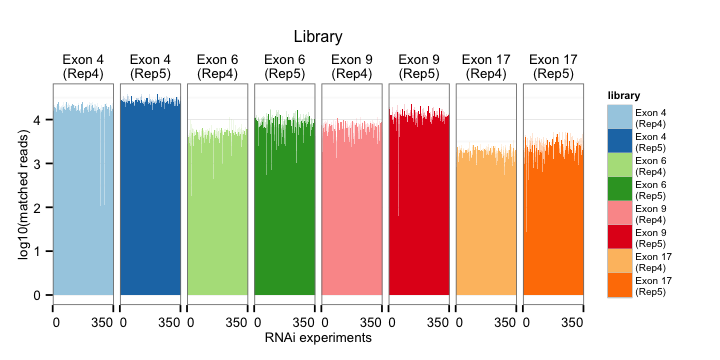

In [74]:
# Figure 1C-D. RNAi experiment reads per experiment
# All matched reads per RNAi experiment
data <- unique(subset(all, select = c("RNAi", "exon_cluster", "library_RNAi_match.sum", "library", "replicate")))

# Barchart faceted by libray (exon and replicate)
p <- ggplot(data, aes(x = as.numeric(RNAi), y = log10(library_RNAi_match.sum), fill = library)) + 
  geom_bar(stat = "identity", width = 1) +
  scale_fill_brewer(palette = "Paired") + 
  facet_grid(. ~ library) + 
  scale_x_discrete(breaks = c(0, 350)) + 
  ggtitle("Library") + 
  ylab("log10(matched reads)") + 
  xlab("RNAi experiments") 
p + theme_bw_small() +
  theme(legend.key.size = unit(1, "lines"),
        legend.key.height = unit(1, "lines"),
        legend.text = element_text(size = 6),
        title = element_text(size = 8),
        axis.text.x=element_text(angle = 0, hjust = c(0,1)),
        panel.grid.major.x = element_blank()
       )
ggsave("Figures/Figure 1C. Barplot log10(Reads) per experiment.pdf", height = 2, width = 5.5)

ERROR: Error in ylab("log10(matched reads)") + xlab("Library"): non-numeric argument to binary operator


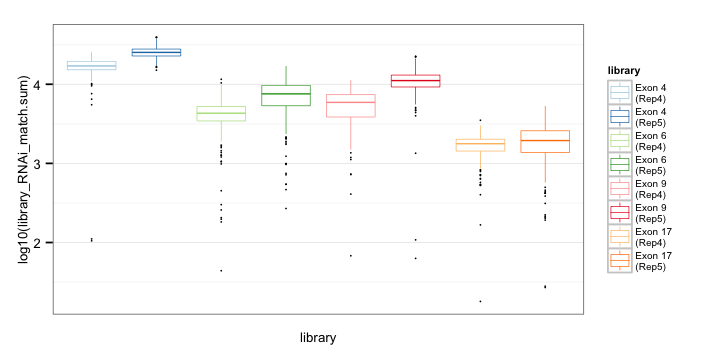

In [75]:
# Boxplot of read matches per library
ggplot(data, aes(x = library, y = log10(library_RNAi_match.sum), color = library)) + 
geom_boxplot(outlier.size = 0.5, size = 0.2) + 
scale_color_brewer(palette = "Paired") + 
theme_bw_small() +
  theme(legend.key.size = unit(1, "lines"),
        legend.key.height = unit(1, "lines"),
        legend.text = element_text(size = 6),
        title = element_text(size = 8),
        panel.grid.major.x = element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x = element_blank(),
        panel.grid.major.x = element_blank()
       )
  ylab("log10(matched reads)") + xlab("Library")
ggsave("Figures/Figure 1D. Boxplot log10(Reads) per experiment.pdf", height = 1.5, width = 2.5) 

# Final Figure 1.

<img 
src="Google%20Drive/UConn/Manuscripts/Dscam%20RNAi%20Paper/Final%20Figures/Figure%201.png">

<b>Fig 1. A highly-multiplexed, next-generation sequencing RNAi screen for RBPs that influence Dscam1 splicing.</b> (A) Schematic of the Dscam1 gene illustrating the RT-PCR amplicon library construction strategy and primer positions (arrows) used to amplify spliced products of exons 4 (blue), 6 (green), 9 (red), and 17 (orange). (B) The total number of reads in this study that matched to Dscam1 variant exons. (C) The number of reads matched to Dscam from each of 350 RNAi experiments that matched matched Dscam1 mRNA products. (D) Boxplots of (C) indicating outliers; note that only 6/2800 experiments has < 100 reads matching Dscam.